In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(19)

In [82]:
means = [[2,2],[8,3],[3,6]]
cov = [[1,0],[0,1]]
N = 500

x0 = np.random.multivariate_normal(means[0], cov, N)
x1 = np.random.multivariate_normal(means[1], cov, N)
x2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((x0,x1,x2),axis=0)

K = 3

X

array([[2.22100326, 1.65953499],
       [1.42225146, 1.59596844],
       [1.39671057, 1.75614772],
       ...,
       [1.43231839, 7.51733815],
       [2.2969038 , 4.62757514],
       [0.69742369, 5.79831613]])

In [83]:
original_label = np.asarray([0]*N + [1]*N + [2]*N).T
original_label

array([0, 0, 0, ..., 2, 2, 2])

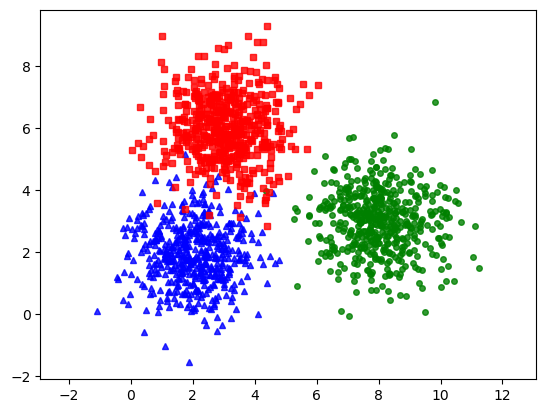

In [84]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    
    X0 = X[label==0,:]
    X1 = X[label==1,:]
    X2 = X[label==2,:]
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

kmeans_display(X,original_label)

In [85]:
def kmeans_init_centers(X,k):
    return X[np.random.choice(X.shape[0],k, replace=True)]

def kmeans_assign_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis=1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    
    for k in range(K):
        Xk = X[labels==k,:]
        
        centers[k,:] = np.mean(Xk, axis=0)
        
    return centers

def has_converged(centers, new_centers):
    return (set([tuple(a) for a in centers]) == set([tuple(b) for b in new_centers])) 

In [86]:
def kmeans(X,K):
    labels = []
    centers = [kmeans_init_centers(X,K)]
    
    it = 0
    
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        
        new_centers = kmeans_update_centers(X,labels[-1],K)
        
        if has_converged(centers[-1],new_centers):
            break
        
        centers.append(new_centers)
        
        it+=1
    return (centers,labels,it)


        
        
    

In [87]:
def kmeans_display_with_centers(X, label,centers):
    K = np.amax(label) + 1
    
    X0 = X[label==0,:]
    X1 = X[label==1,:]
    X2 = X[label==2,:]
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    
    for k in range(K):
        plt.plot(centers[k,0], centers[k,1], 'yo', markersize = 10, alpha = 1)
        
        
    

    plt.axis('equal')
    plt.plot()
    plt.show()

Centers found by ours kmean algorithms
[[1.98935175 1.913386  ]
 [8.01960028 2.99212112]
 [3.04013946 6.00690405]]


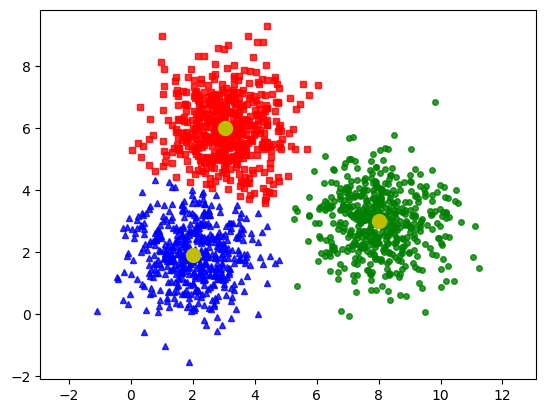

In [88]:
(centers,labels,it) = kmeans(X,K)

print("Centers found by ours kmean algorithms")
print(centers[-1])

kmeans_display_with_centers(X,labels[-1],centers[-1])

In [89]:
import os
import sys

sys.path.append(os.path.abspath(".."))
from ML_library import BasicKmeanCluster

kmeans = BasicKmeanCluster()

(centroid,label,it) = kmeans.kmeans(X,K)

kmeans_display_with_centers(X,label,centroid)

TypeError: kmeans_init_centroid() takes 2 positional arguments but 3 were given